# Face Mask Detection using Convolutional Neural Networks

## Introduction

This project uses a Deep Neural Network, more specifically a Convolutional Neural Network, to differentiate between images of people, with masks, without masks and incorrectly placed masks. Manually built and pretrained networks will be used to perform this classification task.

**Face-Mask-Detection-Using-CNN**

* Outbreak of the Coronavirus pandemic has created various changes in the lifestyle of everyone around the world.
* Among these changes, wearing a mask has been very vital to every individual.
* Detection of people who are not wearing masks is a challenge due to the large populations.
* This face mask detection project can be used in schools, hospitals, banks, airports etc as a digitalized scanning tool. 
  - The technique of detecting people’s faces and segregating them into three classes namely the people with masks and people without masks and partial masks is done with the help of image processing and deep learning.
* With the help of this project, a person who is monitoring the face mask status for a particular firm can be seated in a remote area and still monitor efficiently and give instructions accordingly.

![img](https://d2h0cx97tjks2p.cloudfront.net/blogs/wp-content/uploads/sites/2/2020/07/dataset-with-mask-1536x844.png)

## Dataset

The data for this mini-project is collected from various sources including the masked images from internet and general frontal face images considered as without mask. This dataset consists of 5029 train images and 1059 test images with 3 classes `with_mask`, `without_mask` and `partial_mask`

Many people are not correctly wearing their masks due to bad practices, bad behaviors or vulnerability of individuals (e.g., children, old people). For these reasons, several mask wearing campaigns intend to sensitize people about this problem and good practices. In this sense, this work proposes three types of masked face detection dataset; namely, the Correctly Masked Face, the Incorrectly Masked Face and their combination for the global masked face detection. This dataset serves the objective of classifying faces that are: 
  
- Without Mask/ With Mask/ Partial Mask
  
Note that this dataset contains some annotated (artificially generated) masks to augment the 'masked' data category.

## Problem Statement

To build and implement a Convolutional Neural Network model to classify between masked/unmasked/partially masked faces.

In [1]:
#@title Download the data
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/MP2_FaceMask_Dataset.zip
!unzip -qq MP2_FaceMask_Dataset.zip
print("Data Downloaded Successfuly!!")

Data Downloaded Successfuly!!


### Import Required packages

In [5]:
import numpy as np
import PIL
from matplotlib import pyplot as plt
import glob, os
from tensorflow import keras
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense,Dropout
from keras.models import Model, load_model
from keras.callbacks import TensorBoard, ModelCheckpoint

## Data Loading and preprocessing (2 points)

### Analyze the shape of images and distribution of classes

In [6]:
# YOUR CODE HERE
test_list = glob.glob("/content/MP2_FaceMask_Dataset/test/*/*.jpg")
train_list = glob.glob("/content/MP2_FaceMask_Dataset/train/*/*.jpg")

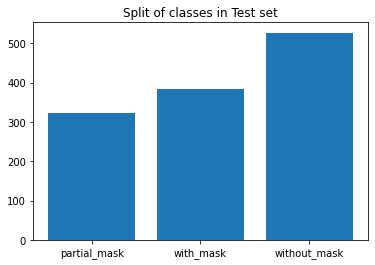

In [7]:
target_test = list(map(lambda x: x.split('/')[4], test_list))
x,y = np.unique(target_test,return_counts=True)
plt.bar(x,y)
plt.title("Split of classes in Test set")
plt.show()

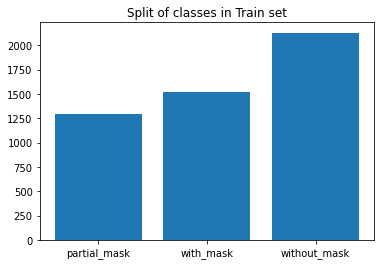

In [8]:
target_train = list(map(lambda x: x.split('/')[4], train_list))
plt.bar(np.unique(target_train,return_counts=True)[0],np.unique(target_train,return_counts=True)[1])
plt.title("Split of classes in Train set")
plt.show()

In [9]:
PIL.Image.open(train_list[100]).size
train_size = list(map(lambda x: PIL.Image.open(x).size, train_list))
np.unique(train_size, return_counts= True)

(array([ 110,  114,  141,  148,  150,  152,  154,  155,  156,  157,  159,
         160,  161,  165,  166,  167,  168,  169,  170,  173,  174,  178,
         179,  180,  181,  182,  183,  184,  187,  188,  189,  190,  191,
         192,  193,  194,  195,  196,  197,  198,  199,  200,  201,  202,
         203,  205,  206,  207,  208,  209,  212,  213,  214,  217,  218,
         220,  221,  222,  224,  225,  226,  227,  228,  229,  230,  231,
         232,  233,  235,  236,  237,  238,  240,  241,  242,  244,  245,
         246,  247,  248,  249,  250,  251,  252,  253,  254,  256,  257,
         258,  259,  260,  261,  262,  263,  264,  265,  266,  267,  268,
         270,  271,  272,  273,  274,  275,  276,  277,  278,  279,  280,
         281,  283,  284,  285,  288,  289,  290,  291,  292,  293,  294,
         295,  296,  297,  298,  299,  300,  301,  303,  306,  307,  308,
         309,  310,  312,  313,  315,  316,  317,  318,  320,  321,  322,
         323,  324,  326,  327,  328, 

### Load the images using ImageDataGenerator

In [10]:
TRAINING_DIR = "/content/MP2_FaceMask_Dataset/train/"
VALIDATION_DIR = "/content/MP2_FaceMask_Dataset/test/"

In [11]:
# YOUR CODE HERE

seed = 32

IDG = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode="nearest",
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=1./255,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    dtype=None,)

image_train_generator = IDG.flow_from_directory(
    TRAINING_DIR,
    target_size=(160, 160),
    color_mode="rgb",
    classes=None,
    class_mode="sparse",
    batch_size=1,
    shuffle=True,
    seed=seed,
    save_to_dir=None,
    save_prefix="",
    save_format="png",
    follow_links=False,
    subset=None,
    interpolation="nearest",
)

image_validation_generator = IDG.flow_from_directory(
    VALIDATION_DIR,
    target_size=(160, 160),
    color_mode="rgb",
    classes=None,
    class_mode="sparse",
    batch_size=1,
    shuffle=True,
    seed=seed,
    save_to_dir=None,
    save_prefix="",
    save_format="png",
    follow_links=False,
    subset=None,
    interpolation="nearest",
)


Found 5029 images belonging to 3 classes.
Found 1259 images belonging to 3 classes.


### Visualize the sample images of each class using data generator

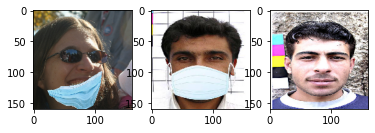

In [12]:
train_classes = image_train_generator.classes
idx0 = np.where(train_classes == 0)[0][21]
idx1 = np.where(train_classes == 1)[0][12]
idx2 = np.where(train_classes == 2)[0][200]

fig, ax = plt.subplots(1,3)
for a, b in enumerate([idx0,idx1,idx2]):
  ax[a].imshow(PIL.Image.fromarray(np.asarray(image_train_generator._get_batches_of_transformed_samples([b])[0]*255, dtype= np.uint8).reshape(160,160,3)))

In [13]:
image_train_generator._get_batches_of_transformed_samples([4000])[0].shape

(1, 160, 160, 3)

## Build the CNN model using Keras



**Convolutional Neural Network:** A neural network in which at least one layer is a convolutional layer. A typical convolutional neural network consists of some combination of the following layers:

* convolutional layers
* pooling layers
* dense layers


**Conv2D**  

Passing an image with input shape of 3-D and to calculate the output: 

 $O = \frac{n - f + 2p}{s} + 1$

**MaxPool** 

The resulting output, when using the "valid" padding option, has a spatial shape (number of rows or columns) of: 

O = `math.floor`$(\frac{input shape - pool size)}{ strides}) + 1$ (when input shape >= pool size)

The resulting output shape when using the "same" padding option is: 

O = `math.floor`$(\frac{input shape - 1}{strides}) + 1$

by default, stride = None, so stride is same as pool size

In [14]:


model = Sequential([
                    Conv2D(64, 7, activation="relu", padding="same", input_shape=[224, 224, 3]),
                    MaxPooling2D(2),
                    Conv2D(128, 3, activation="relu", padding="same"),
                    Conv2D(128, 3, activation="relu", padding="same"),
                    MaxPooling2D(2),
                    Conv2D(256, 3, activation="relu", padding="same"),
                    Conv2D(256, 3, activation="relu", padding="same"),
                    MaxPooling2D(2),
                    Flatten(),
                    Dense(128, activation="relu"),
                    Dropout(0.5),
                    Dense(64, activation="relu"),
                    Dropout(0.5),
                    Dense(3, activation="softmax")
                    ])
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

batch_size = 64

image_train_generator = IDG.flow_from_directory(
    TRAINING_DIR,
    target_size=(224, 224),
    color_mode="rgb",
    classes=None,
    class_mode="sparse",
    batch_size=batch_size,
    shuffle=True,
    seed=seed,
    save_to_dir=None,
    save_prefix="",
    save_format="png",
    follow_links=False,
    subset=None,
    interpolation="nearest",
)

image_validation_generator = IDG.flow_from_directory(
    VALIDATION_DIR,
    target_size=(224, 224),
    color_mode="rgb",
    classes=None,
    class_mode="sparse",
    batch_size=batch_size,
    shuffle=True,
    seed=seed,
    save_to_dir=None,
    save_prefix="",
    save_format="png",
    follow_links=False,
    subset=None,
    interpolation="nearest",
)

# image_train_generator.next()[1].shape

history = model.fit(image_train_generator, epochs = 8, validation_data = image_validation_generator)

Found 5029 images belonging to 3 classes.
Found 1259 images belonging to 3 classes.
Epoch 1/8
79/79 [==============================] - 134s 1s/step - loss: 0.6320 - accuracy: 0.7512 - val_loss: 0.3205 - val_accuracy: 0.8967
Epoch 2/8
79/79 [==============================] - 70s 877ms/step - loss: 0.2688 - accuracy: 0.9121 - val_loss: 0.2108 - val_accuracy: 0.9309
Epoch 3/8
79/79 [==============================] - 70s 878ms/step - loss: 0.2505 - accuracy: 0.9217 - val_loss: 0.1476 - val_accuracy: 0.9611
Epoch 4/8
79/79 [==============================] - 69s 873ms/step - loss: 0.1899 - accuracy: 0.9401 - val_loss: 0.1662 - val_accuracy: 0.9547
Epoch 5/8
79/79 [==============================] - 69s 872ms/step - loss: 0.1731 - accuracy: 0.9461 - val_loss: 0.1406 - val_accuracy: 0.9627
Epoch 6/8
79/79 [==============================] - 69s 874ms/step - loss: 0.1347 - accuracy: 0.9628 - val_loss: 0.1093 - val_accuracy: 0.9698
Epoch 7/8
79/79 [==============================] - 69s 874ms/step 

In [15]:
model.evaluate(image_validation_generator)

20/20 [==============================] - 10s 469ms/step - loss: 0.1217 - accuracy: 0.9579


[0.12172197550535202, 0.9579030871391296]


* Load the pre-trained model
* Fit and evaluate the data



In [16]:
# YOUR CODE HERE

modelV = tf.keras.Sequential([
                    VGG16(include_top=False, weights='imagenet', input_tensor=None,
    pooling= None, input_shape = (224,224, 3),
    classifier_activation='softmax'),
                    Flatten(),
                    Dense(3, activation="softmax")
                    ])


modelV.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

58900480/58889256 [==============================] - 1s 0us/step


In [17]:
history = modelV.fit(image_train_generator, epochs = 5, validation_data = image_validation_generator)

Epoch 1/5
79/79 [==============================] - 154s 2s/step - loss: 0.9293 - accuracy: 0.6490 - val_loss: 0.1877 - val_accuracy: 0.9420
Epoch 2/5
79/79 [==============================] - 126s 2s/step - loss: 0.1597 - accuracy: 0.9477 - val_loss: 0.1386 - val_accuracy: 0.9611
Epoch 3/5
79/79 [==============================] - 126s 2s/step - loss: 0.1226 - accuracy: 0.9624 - val_loss: 0.1285 - val_accuracy: 0.9635
Epoch 4/5
79/79 [==============================] - 126s 2s/step - loss: 0.0951 - accuracy: 0.9694 - val_loss: 0.0997 - val_accuracy: 0.9746
Epoch 5/5
79/79 [==============================] - 126s 2s/step - loss: 0.0980 - accuracy: 0.9674 - val_loss: 0.1063 - val_accuracy: 0.9651


In [18]:
modelR = tf.keras.Sequential([
                    ResNet50(include_top=False, weights='imagenet', input_tensor=None,
    pooling= None, input_shape = (224,224, 3),
    classifier_activation='softmax'),
                    Flatten(),
                    Dense(3, activation="softmax")
                    ])


modelR.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

94781440/94765736 [==============================] - 1s 0us/step


In [19]:
history = modelR.fit(image_train_generator, epochs = 5, validation_data = image_validation_generator)

Epoch 1/5
79/79 [==============================] - 130s 2s/step - loss: 0.4879 - accuracy: 0.9419 - val_loss: 1.1643 - val_accuracy: 0.4241
Epoch 2/5
79/79 [==============================] - 115s 1s/step - loss: 0.1384 - accuracy: 0.9757 - val_loss: 1.0794 - val_accuracy: 0.4241
Epoch 3/5
79/79 [==============================] - 115s 1s/step - loss: 0.1012 - accuracy: 0.9843 - val_loss: 1.0695 - val_accuracy: 0.4424
Epoch 4/5
79/79 [==============================] - 114s 1s/step - loss: 0.6775 - accuracy: 0.9686 - val_loss: 221444.6719 - val_accuracy: 0.2566
Epoch 5/5
79/79 [==============================] - 114s 1s/step - loss: 0.2771 - accuracy: 0.9561 - val_loss: 1.0877 - val_accuracy: 0.4241
